In [85]:
from scipy.stats import chi2
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

### Multinomial Distribution

The Multinomial Distribution with $K$ modalities (or equivalently $K$ possible outcomes in a trial, or $K$ categories) is a generalization of the binomial distribution. It models the probability of counts of the $K$ possible outcomes of the experiment in $n′$ i.i.d. trials of the experiment.

It is parameterized by the parameters $n′,p_1,\dots,p_K$ where

1. $n′$ is the number of i.i.d trials of the experiment;

2. $p_i$ is the probability of observing outcome $i$ in any trial, and hence the $p_i$'s satisfy $p_i\ge 0 \forall i=1,\dots,K$ and $\sum_{i=1}^K p_i=1$. 

Let $p:=[p_1,p_2, \dots p_K]^T$ be a column vector and note that $p\in \Delta_K$ where $\Delta_K$ is the simplex of dimension $K$. (This is just the portion of the plane in $\mathbb{R}^K$ that is a unit distance away from the origin along all the $K$ axes where all the components of points in the plane are positive.  In the case of $\mathbb{R}^2$ it is the line $x_1 + x_2=1$ where both $x_1$ and $x_2$ are positive ). 



<function matplotlib.pyplot.show(close=None, block=None)>

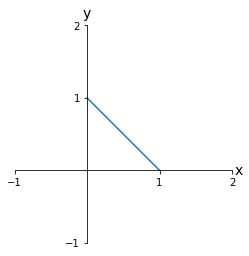

In [78]:
fig, ax = plt.subplots(1,1)
xs=[0,1]
ys=[1,0]
# length of axes
xmin, xmax, ymin, ymax, zmin, zmax = -1, 2, -1, 2 , -1, 2
ticks_frequency = 1
# set identical scales for both axes
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')
# 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
#
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])
#
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
ax.plot(xs,ys,label="$x+y=1$")
#plt.legend()

plt.show

<IPython.core.display.Javascript object>


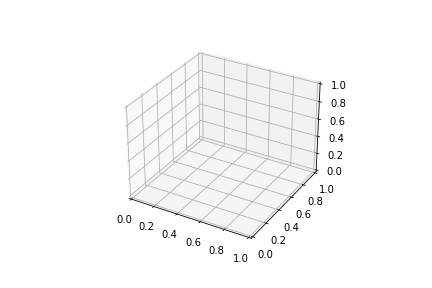

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [88]:
fig = plt.figure()
ax=plt.axes(projection="3d")

def simplex(x,y):
    if x + y < 0:
        retval = 0
    else:
        retval = 1 - x -y
    return retval

x = np.linspace(0,1,10)
y = np.linspace(0,1, 10)
X, Y = np.meshgrid(x,y)
Z=simplex(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='binary')

The multinomial distribution can be represented by a random vector $N\in \mathbb{Z}^K$ to represent the number of instances $N^{(i)}$ of the outcome $i=1,\dots,K$. Note that $\sum_{i=1}^K N^{(i)}=n′$. The _multinomial pmf_ for all $\mathbf{n}$ such that $\sum_{i=1}^K n^{(i)}=n′$, $n^{(i)}\ge 0, i=1,\dots,K$, and $n^{(i)}\in \mathbb{Z},i=1,\dots,K$ is given by

$$
p_N(N^{(1)}=n^{(1)},\dots,N^{(K)}=n^{(k)})=	\frac{n'!}{n^{(1)}!n^{(2)}!\dots n^{(K)}!}\prod_{i=1}^K p^{n^{(i)}}_i	 
$$

### Categorial (Generalized Bernoulli) Distribution and its Likelihood

The multinomial distribution, when specialized to $n′=1$ for any $K$ gives the categorical distribution . When $K=2$ and the two outcomes are $0$ and $1$ the categorical distribution is the Bernoulli distribution, and for any $K\ge 2$ the categorical distribution is also known as the generalized Bernoulli distribution .

The categorical distribution, therefore, models the probability of counts of the $K$ possible outcomes of a discrete experiment in a single trial. Since the total count is equal to $1$ (only one trial), we can use a random variable $X$ to represent the outcome of the trial. This means the sample space of a categorical random variable $X$ is

$$
E={a_1,\dots,a_K}. 	 	 
$$

The vector $\bf{p}$ is the parameter of a categorical random variable. The pmf of a categorical distribution can be given as

$$
\mathbb{P}(X=a_j)=\prod_{i=1}^K p^{\mathbb{1}(a_i=a_j)}_i =p_j,  j=1,\dots,K
$$
	 

Let $\bf{P}_\bf{p}$ denote the distribution of a categorical random variable with sample space $E=\lbrace a_1,\dots,a_K\rbrace$ and parameter vector $\bf{p}$. The categorical statistical model can thus be written as the tuple $\left( \lbrace a_1,\dots,a_K\rbrace,\lbrace \bf{P}_\bf{p}\rbrace _{\bf{p}\in\Delta_K}\right)$.

In goodness of fit testing for a discrete distribution, we observe $n$ iid samples $X_1,\dots,X_n$ of a categorical random variable $X$ and it is our aim to find statistical evidence of whether a certain distribution $\bf{p}^0 \in \Delta_K$ could have generated $X_11,\dots,X_n$.

The categorical likelihood of observing a sequence of $n$ iid outcomes $X_1,X_2,\dots,X_n \sim X$ can be written using the number of occurrences $N_i,i=1,\dots,K$, of the $K$ outcomes as

$$
L_n(X_1,\dots,X_n,p_1,\dots,p_K)=p^{N_1}_1p^{N_2}_2\dots p^{N_K}_K
$$

The categorical likelihood of the random variable $X$, when written as a random function, is

$$
L(X,p_1,\dots,p_K)=\prod_{i=1}^K p^{\mathbb{1}(X=a_i)}_i
$$

### Chi-Squared Test - Example Problems

#### 1

Let $\mathbf{\hat{p}}$ denote the MLE for a categorical statistical model $\left( \lbrace a_1,\dots, a_K\rbrace, \lbrace \mathbf{P_p}\rbrace_{\mathbf{p}\in\Delta_k}\right)$.  Let $\mathbf{p}^*$ denote the true parameter.  Then $\sqrt{n}(\mathbf{\hat{p}}-\mathbf{p}^*)$ is asymptoticaly normal and

$$
n\sum_{i=1}^K \frac{(\hat{p}_i-p^*_i)^2}{p_i^*} \substack{\text(d)\\ \longrightarrow\\ n\to \infty}\chi^2_{K-1}
$$

Consider the particular categorical distribution from before where we had $X_1,\dots,X_n \substack{\text{iid}\\\sim}\mathbf{P_p}$ with the associated statistical model $\left( \lbrace 1, 2, 3\rbrace , \lbrace \mathbf{P_p}\rbrace_{\mathbf{p}\in\Delta_3}\right)$.  We will use the fact above to thest between the two hypotheses

$$
H_0: \mathbf{p}^* = [1/3, 1/3, 1/3]^T
$$

$$
H_0: \mathbf{p}^* \ne [1/3, 1/3, 1/3]^T
$$

Consider the test

$$
\psi = \mathbb{1}\left( n\sum_{i=1}^3 \frac{(\hat{p}_i - \frac{}1{3})^2}{1/3} \gt C\right)
$$

for some threshold $C$

Compute the (asymptotic) p-value of the test $\psi$ on the data set

$$
\mathbf{x}=1,3,1,2,2,2,1,1,3,1,1,2
$$


In [33]:
x=[1,3,1,2,2,2,1,1,3,1,1,2]
#x=[2,2,2,2,2,3,3,3,3]
p_0={1:1/3,2:1/3,3:1/3}

def psi(x, p_0):
    length = len(x)
    counts = {i:x.count(i) for i in x}
    p_hat = {}
    for k in p_0:
        if k in x:
            p_hat[k] = (counts[k]/length)
        else:
            p_hat[k]=(0)
    s=0
    for k in counts:
        s+=((p_hat[k]-p_0[k])**2)/p_0[k]
    
    return len(x)*s

X=psi(x,p_0)
print(1-chi2.cdf(X,2))


0.36787944117144233


#### 2

We are testing a dice for fairness.  The model is $\left( \lbrace 1,2,3,4,5,6\rbrace, \lbrace \mathbf{P_p}\rbrace_{\mathbf{p}\in\Delta_6}\right)$ and we roll the dice 15 times to get data


$$
H_0: \mathbf{p}^* = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]^T
$$

$$
H_0: \mathbf{p}^* \ne [1/6, 1/6, 1/6, 1/6, 1/6, 1/63]^T
$$

Our test statistic is

$$
T_n=n\sum_{i=1}^6 \frac{(\hat{p}_i - \frac{}1{6})^2}{1/6}
$$

And asymptotically will converge in distribution to $\chi^2_{5}$

We propose the test

$$
\psi=\mathbb{1}(T_n \gt C)
$$

What value of C should be chosen so that we have a test at asymptotic levle of $5\%$?


In [41]:
q_alpha = chi2.ppf(0.95,5)
print(f'q_alpha: {q_alpha:0.3f}')

q_alpha: 11.070


Given the data

$$
X = 5,6,1,6,4,1,2,4,6,6,1,6,6,3,5
$$

Does the test reject or fail to reject on this data?

In [45]:
x = [5,6,1,6,4,1,2,4,6,6,1,6,6,3,5]
p_0 = {1:1/6,2:1/6,3:1/6,4:1/6,5:1/6,6:1/6}

Z = psi(x,p_0)
if Z < q_alpha:
    print(f'fail to reject: Z = {Z:0.3f} with q_alpha = {q_alpha:0.3f}' )
else:
    print(f'reject: Z = {Z:0.3f} with q_alpha = {q_alpha:0.3f}' )

fail to reject: Z = 7.000 with q_alpha = 11.070


### 3: Non-uniform distribution

Three planets have a conference where they want to ensure appropriate representation based on planet size: X=1 million inhabitants, Y=4 million inhabitants, Z=5 million inhabitants

Let $E=\lbrace X, Y, Z \rbrace$ denote the sample space.  There are a total of $100$ visitors for this years meeting from the overall population of 10 million.  Let $\zeta_1,\dots\zeta_{100}$ denote random variables corresponding to aliens $1, 2, \dots, 100$ respectivly so that

$$
\zeta_i = \lbrace \substack{X \text{ if alien i comes from Planet X}\\Y \text{ if alien i comes from Planet Y}\\Z \text{ if alien i comes from Planet Z}}
$$

We model the outcome of the selection process as an experiment with categorical distribution model $\left( \lbrace X,Y,Z\rbrace, \lbrace\mathbf{P_p}\rbrace_{\mathbf{p}\in\Delta_3}\right)$ and write $\zeta_1, \dots, \zeta_{100}\overset{\text{iid}}{\sim}\mathbf{P_{p^*}}$ where $\mathbf{p}^*$ is the true parameter.  The hypotheses are

$$
H_0: \mathbf{p}^* = [1/10, 4/10, 5/10]^T
$$
$$
H_0: \mathbf{p}^* \ne [1/10, 4/10, 5/10]^T
$$

Suppose that we observe $20$ visitors from Planet X, $30$ visitors from Planet Y, and $50$ visitors from Planet Z.  Let $\hat{\mathbf{p}}$ denote the MLE for $\mathbf{p}^*$ for this data set.  What is the asymptotic p value for this test?

In [49]:
data=[]
for _ in range(20):
    data.append(1)
for _ in range(30):
    data.append(2)
for _ in range(50):
    data.append(3)
p_0 = {1:1/10, 2:4/10, 3:5/10}
psi_100 = psi(data,p_0)
print(psi_100)
print(1-chi2.cdf(psi_100,2))

12.500000000000004
0.0019304541362277217


In the problems on this page, you will apply the $\chi^2$ goodness of fit test to determine whether or not a sample has a binomial distribution.

So far, we have used the $\chi^2$ test to determine if our data had a categorical distribution with specific parameters (e.g. uniform on an N element set).

For the problems on this page, we extend the discussion on $\chi^2$ tests beyond what was discussed in lecture to the following more general statistical set-up.

Let $X_1,\dots,X_n\underset{\sim}{\text{iid}}X\sim\mathbf{P}$ denote iid discrete random variables supported on $\lbrace0,\dots,K\rbrace$. We will decide between the following null and alternative hypotheses:

$$
H0: 	\mathbf{P}\in\lbrace \text{Bin}(K,\theta)\rbrace_{\theta\in(0,1)} 	 	 
$$
$$
H1: 	\mathbf{P}\notin\lbrace \text{Bin}(K,\theta)\rbrace_{\theta\in(0,1)} 	 	 
$$
where the null hypothesis can be rephrased as:
$$
H0: 	\exists \theta \in (0,1) \text{such that} \forall j=0,\dots,K, \mathbb{P}(X=j)=\binom{K}{j} \theta^j(1−θ)^{K−j} 	 
$$

### $\chi^2$ for a Family of Distributions:

 Now, we return to the following more general statistical set-up.

Let X1,…,Xn∼iidP denote iid discrete random variables supported on {0,…,K}. We will decide between the following null and alternative hypotheses.

$$
H0: 	P∈{Bin(K,θ)}θ∈(0,1). 	 	 
$$

$$
H1: 	P∉{Bin(K,θ)}θ∈(0,1). 	 	 
$$

Let fθ denote the pmf of the distribution Bin(K,θ), and let θˆ denote the MLE of the parameter θ from the previous problem.
Further, let Nj denote the number of times that j (j∈{0,1,…,K}) appears in the data set X1,…,Xn (so that ∑j=0KNj=n.) The χ2 test statistic for this hypothesis test is defined to be
Tn:=n∑j=0K(Njn−fθˆ(j))2fθˆ(j).
	 

This statistic is different from before. Previously, under the null hypothesis, P(X=j)=pj for some fixed pj. Here, instead, we use fθˆ(j) to estimate P(X=j). This statistic still converges in distribution to a χ2 distribution, but the number of degrees of freedom is smaller.

Degrees of Freedom for χ2 Test for a Family of Distribution

More generally, to test if a distribution P is described by some member of a family of discrete distributions {Pθ}θ∈Θ⊂Rd where Θ⊂Rd is d-dimensional, with support {0,1,2,…,K} and pmf fθ, i.e. to test the hypotheses:
 	H0: 	P∈{Pθ}θ∈Θ 	 	 
 	H1: 	P∉{Pθ}θ∈Θ, 	 	 

then if indeed P∈{Pθ}θ∈Θ⊂Rd (i.e., the null hypothesis H0 holds), and if in addition some technical assumptions hold, then we have that
Tn:=n∑j=0K(Njn−fθˆ(j))2fθˆ(j)−→−−n→∞(d)χ2(K+1)−d−1.
	 

Note that K+1 is the support size of Pθ (for all θ.)

In our example testing for a binomial distribution, the parameter θ is one-dimensional, i.e. d=1. Therefore, under the null hypothesis H0, it holds that
Tn−→−−n→∞(d)χ2(K+1)−1−1=χ2K−1.
	 

#### Chi-squared Test for a Binomial Distribution on a Sample Data Set I 

Consider the same statistical set-up as above. In particular, we have the test statistic

$$
T_n:=n\sum_{j=0}^K \frac{\left( \frac{N_j}{n} - f_{\hat{θ}}(j) \right)^2}{f_{\hat{θ}}(j)}
$$

where θˆ is the MLE for the binomial statistical model ({0,1,…,K},{Bin(K,θ)}θ∈(0,1)).

We define our test to be

$$
\psi_n = \mathbb{1}(T_n\gt \tau)
$$	 

where $\tau$ is a threshold that you will specify. For the remainder of this page, we will assume that $K=3$ (the sample space is $\lbrace0,1,2,3\rbrace$).

What value of $\tau$ should be chosen so that $\psi_n$ is a test of asymptotic level $5\%$? Give a numerical value with at least 3 decimals.

##### Solution
Since $K=3$ and since the family of distributions has a $1$ dimensional parameter space, $d=1$.  Thus we choose our level from a $\chi^2_2$

In [91]:
tau = chi2.ppf(.95,2)
print(f'Tau should be: {tau:0.3f}')

Tau should be: 5.991


In [92]:
data=[]
for _ in range(339):
    data.append(0)
for _ in range(455):
    data.append(1)
for _ in range(180):
    data.append(2)
for _ in range(26):
    data.append(3)
p_0 = {0:0.339,1:0.455, 2:0.180, 3:0.026}
psi_100 = psi(data,p_0)
print(psi_100)
print(1-chi2.cdf(psi_100,2))

0.0
1.0


### Recitation: Chi-Squared Goodness of Fit Test

Suppose we have $X_1,\dots,X_n$ iid with a discrete and finite sample space. We wish to perform hypothesis tests to:

- Task 1: Understand whether the data was generated with a distribution with a particular pmf $p^0$.

- Task 2: Understand whether the data was generated with a distribution in a family of distributions $\lbrace \mathbb{P}_θ\rbrace$, where $\theta\in\mathbb{R}^d$ models the family of distributions $\lbrace \mathbb{P}_θ\rbrace$. 

In this recitation, we derive the chi-squared goodness of fit test statistic to perform Task 1 and generalize this test statistic to perform Task 2.

Note: You are only required to view videos 1 and 5; the rest contain additional optional theoretical material for those who are interested.

Video Note: In the last video on this page ("Generalization of Chi-Squared Test to a Family of Discrete Distributions and an Exercise"), the table that is presented in the sample exercise is incorrect. The categories should be $0,1,2,3$ with the corresponding number of occurrences and not $0,1,2,3$ or more. Therefore, the category 4 or more, which is not presented in the table, is assumed to have 0 occurrences. 

Suppose that we have a statistical model of the following form: $(\lbrace a_1, \dots, a_K\rbrace, \lbrace \mathbb{P}_{p\in\Delta_K})$.

What this is saying is that we have a Categorical Statistical Model.  There are $K$ categories  $\lbrace a_1, \dots, a_K\rbrace$ (think of these as $K$ different outcomes that our random variable might take.  These categories are sometimes called the modalities of the variable).  We are assuming that each of the various outcomes, or categories, will be realized with a certain probability.  The specific probability mass function is unknown, but it can be parameterized by a $K$ dimensional vector $\mathbf{p}=[p_1,\dots,p_K]^T$, where $p_i$ is the probability that the element $a_i$ is realized.  Note that the vector $\mathbf{p}$ has to satisfy the condition of being in the Simplex of dimension $K$, $\Delta_K$ where this is the space of all vectors in $\mathbb{R}^K$ such that $\sum_{i=1}^K p_i = 1$ and where $p_i \ge 0$.  Geometricaly this is a $K$ sided hyper triangle sitting in the all positive hyper octant. For the case of K=2, it is just the line segment $x+y=1$ where x and y are both positive.

For an example of when we might use this sort of model, suppose that we want to investigate the results of rolling a a $6$ sided dice.  In this case we have that our sample space consists of the possible outcomes of rolling the dice $\lbrace 1, 2, 3, 4, 5, 6\rbrace$.  The probability space would then be parameterized by a parameter vector $\mathbf{p}$, and in the case of a fair dice, we would expect that parameter to be $[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]^T$.  This now gives us a framework to examine questions about wheather or not a dice is fair.

We say that $X$ is a _Categorical Random Variable_ if $X$ takes values from our sample space $\lbrace a_1, \dots, a_K\rbrace$ where the probability of that random variable taking on a particular value $a_i$ is given by $p_i$, which we write as  $\mathbb{P}(X=a_i)=p_i$ for $i = 1,\dots,K$

Now, lets assume that we have collected some data, $X_1, \dots, X_n$ which we assume to be independent and all taken from the same underlying distribution $\mathbf{P_p}$.  One of the questions we can ask is "how likely is it that the data was generated by a PMF with some particular parameter vector $\mathbf{p}$".  These sorts of questions are called Goodnes of Fit questions.  

In our concrete example of rolling a dice we might be curious about whether or not is the dice fair?  So how would we go about testing this?  To begin with we have no data, and no reason to believe that the dice is not fair, so a reasonable null hypothesis is that the probability mass function that the dice obeys has the parameter vector $\mathbf{p}^0 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]^T$.  The alternative hypothesis would then be is that parameter vector any other vector.  So what we are interested in is this:  the dice we have has a parameter vector $\mathbf{p}$, and is there statistical evidence that $\mathbf{p}$ is equal to $\mathbf{p}^0$.

$$
H_0: \mathbf{p} = \mathbf{p}^0
$$
$$
H_1: \mathbf{p} \ne \mathbf{p}^0
$$

### Walds Test and Reparameterization of a Categorical Model

Let $\hat{\theta}$ be the Maximum Likelihood Estimator, MLE, for some parameter $\theta$ of a statistical model where $\theta\in\mathbb{R}^K$.  Consider the Wald statistic which converges in distribution to the Chi-Squared distribution with $K$ degrees of freedom:

$$
n(\theta^0-\hat{\theta})^T I(\theta^0)(\theta-\hat{\theta}) \substack{\text(d)\\ \longrightarrow\\ n\to \infty}\chi^2_{K}
$$

Which is the statistic we used for the Wald's Test.  Let's take a closer look at what happens when we try to use this statistic in our case of a discrete distribution where we have n samples, and the observed counts of the various modalities $a_i$ is given by $N_1, \dots, N_K$ with $\sum N_i = n$.  If we construct our MLE $\hat{p}=[\frac{N_1}{n}, \dots,\frac{N_K}{n}]^T$

Prerequisites:

    College-level single and multi-variable calculus
    Vectors and matrices

Preparatory Resources
Please note, none of these courses are required for the MicroMasters credential and none must be taken as a paid, Verified Learner. No specific courses are required but certain knowledge and skills are prerequisites for the SDS MicroMasters program. Learners are welcome to pursue the required knowledge and skills through any means available to them, but as a courtesy, links to two different types of courses are provided below: courses offered on edX, and courses offered on MIT Open Courseware.

    The edX courses are live, with live discussion forums and TA’s to answer questions. They are instructor-led and occur during specific runs of time.
    The OpenCourseWare(OCW) courses are archived, so they are self-paced and available at any time, but do not offer live support such as discussion forums or support from TAs.

For learners without a strong knowledge of Python:

    edX: [Introduction to Computer Science and Programming with Python](https://www.edx.org/course/6-00-1x-introduction-to-computer-science-and-programming-using-python-3)
    OCW: [Introduction to Computer Science and Programming with Python](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/)

For all learners:

    edX: [Introduction to Computational Thinking and Data Science](https://www.edx.org/course/6-00-2x-introduction-to-computational-thinking-and-data-science-3)
    OCW: [Introduction to Computational Thinking and Data Science](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/)

For learners without a strong knowledge of calculus:

    edX: [Single Variable Calculus](https://www.edx.org/xseries/mitx-18.01x-single-variable-calculus)
    OCW: [Single Variable Calculus](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/)
    OCW: [Multivariable Calculus on MIT Open Courseware](https://ocw.mit.edu/courses/mathematics/18-02sc-multivariable-calculus-fall-2010/)

For learners without a strong knowledge of linear algebra:

    edX: [Linear Algebra Unit 1](https://www.edx.org/course/transfer-functions-and-the-laplace-transform)
    edX: [Linear Algebra Unit 2](https://www.edx.org/course/18-032x-differential-equations-2x2-systems)
    OCW: [Linear Algebra (In-Depth)](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/)
